# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [48]:
# cat=Table.read('./data/Ldust/dmu26_XID+SPIRE_HDF-N_cat.fits')
# cat=Table.read('./data/prev/dmu26_XID+SPIRE_HDF-N_cat.fits')
cat=Table.read('./data/20201112/dmu26_XID+SPIRE_HDF-N_cat.fits')


In [49]:
cat

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J123700.257+620909.759,189.251072894303,62.1527109698889,13.269206,15.288277,11.346155,12.320582,16.079477,8.954535,10.85166,17.395271,4.0739293,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,0.9983124,1.0002592,0.9981173,3464.482,2904.6138,2817.259,1.0,1.0,1.0
HELP_J123702.948+620833.137,189.262284624303,62.1425379298889,2.028955,4.4859304,0.5302744,2.1718059,4.9273815,0.58496094,2.8664916,7.0872607,0.7165782,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,1.0006852,0.99925315,0.9989893,2494.4382,3234.2832,3867.8232,1.0,1.0,1.0
HELP_J123659.934+620821.677,189.249725584303,62.139354599888904,1.5467324,3.202984,0.4412056,1.3100102,3.0524242,0.36780852,2.721282,6.8357496,0.74570954,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,0.99864846,0.998729,0.9988941,2703.0713,2753.4817,3622.4727,1.0,1.0,1.0
HELP_J123702.859+620836.779,189.261913014303,62.1435496798889,2.3397357,4.915031,0.660087,2.5253842,5.3207817,0.6596837,3.1070921,7.6581454,0.859068,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,0.9990549,0.99916846,0.99946564,2948.9133,2454.354,2858.6477,1.0,1.0,1.0
HELP_J123705.341+620829.581,189.272252334303,62.1415501598889,1.7730557,3.5593443,0.48890024,1.6129584,3.7910585,0.42117897,3.3815908,8.262737,0.903474,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,1.0018903,0.9997596,1.0002667,2066.9385,2411.0818,2946.2283,1.0,1.0,1.0
HELP_J123704.146+620820.673,189.267275464303,62.1390758198889,0.95177466,2.262911,0.24779259,1.1241194,2.8777087,0.3021833,2.7409399,6.78176,0.70523524,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,0.99904275,0.9997767,0.99919105,2989.417,2364.2634,3393.071,1.0,1.0,1.0
HELP_J123701.354+620844.674,189.255640804303,62.1457426998889,2.980795,5.499645,0.9751527,2.2603126,5.136643,0.5822252,3.682227,8.971694,1.0219939,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,0.9999715,1.0003608,0.99909115,2648.752,2556.157,2815.7505,1.0,1.0,1.0
HELP_J123658.639+620828.237,189.244330574303,62.1411769698889,2.0121295,4.376318,0.560286,0.9583899,2.4940803,0.25407135,2.2387798,5.670925,0.5789216,-4.870384,-8.794343,-33.35026,3.989855,5.3900557,15.189782,0.99932694,0.99926907,1.0002186,2607.2585,2911.9683,2641.5894,1.0,1.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

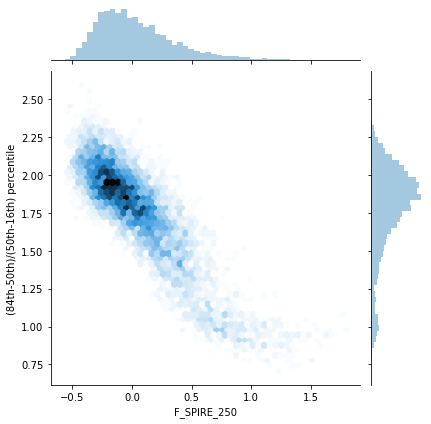

In [53]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


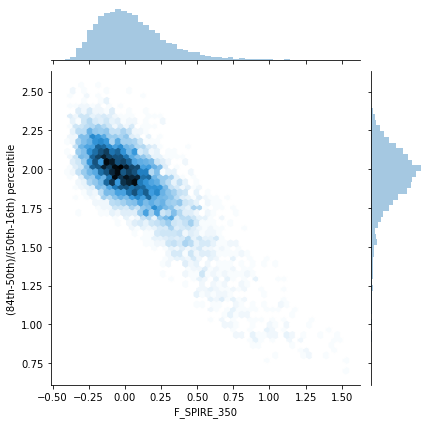

In [56]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_HDF-N.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_HDF-N.pdf', bbox='tight')

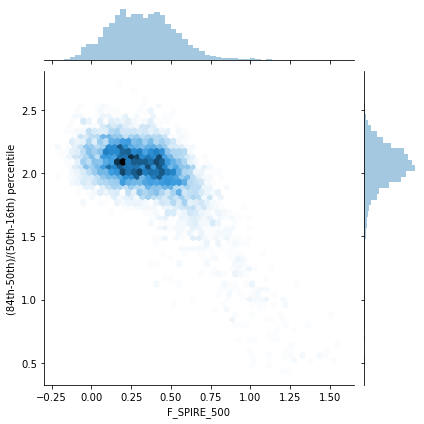

In [57]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE500_HDF-N.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_HDF-N.pdf', bbox='tight')


In [58]:
10**0.75

5.623413251903491

## Add flag to catalogue

In [62]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [63]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 5)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 5)


In [64]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

6103 6103 6103 6103


In [65]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [66]:
cat.write('./data/dmu26_XID+SPIRE_HDF-N_cat_20201118.fits', format='fits',overwrite=True)


### Check Map

In [67]:
from astropy.io import fits
import pylab as plt

In [68]:
Pval1=fits.open('./data/prev/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval2=fits.open('./data/Ldust/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval3=fits.open('./data/20201112/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')


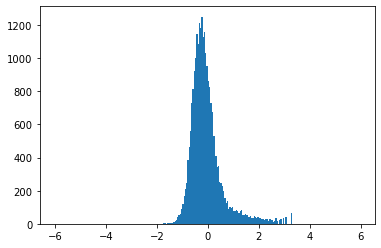

In [69]:
plt.hist(Pval1[1].data[np.isfinite(Pval1[1].data)],bins=np.arange(-6,6,0.05));

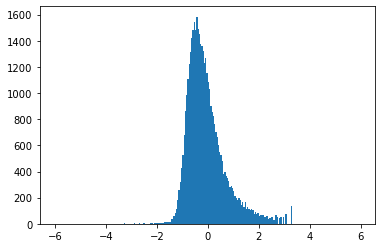

In [70]:
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05));

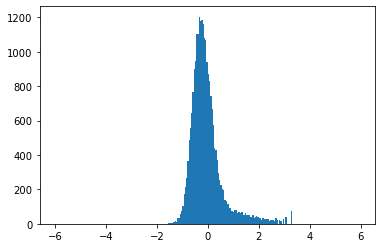

In [71]:
plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6,0.05));

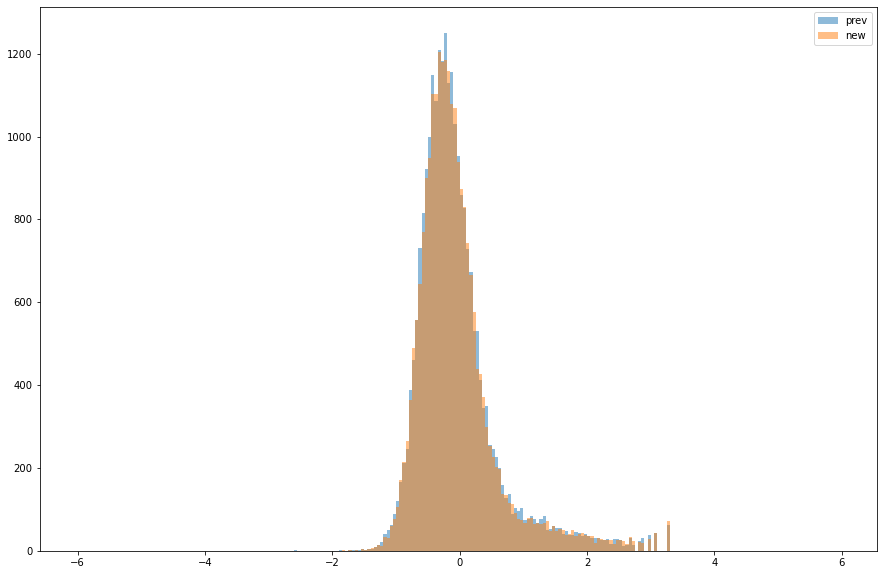

In [72]:
plt.figure(figsize=(15,10))
plt.hist(Pval1[1].data[np.isfinite(Pval1[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='prev');
# plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='Ldust');
plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
plt.legend()

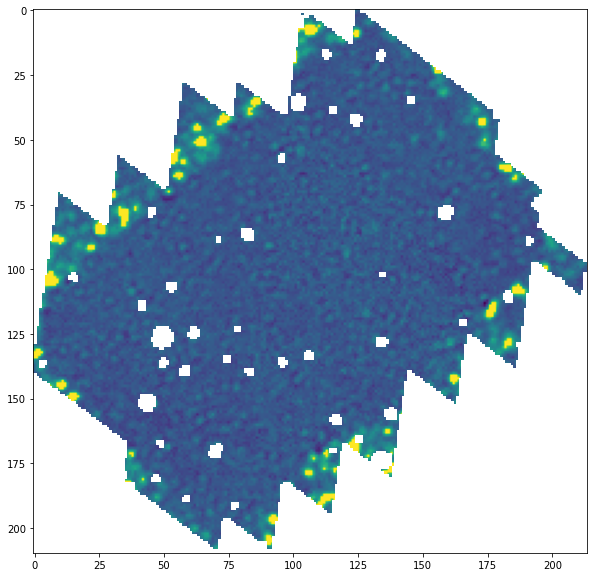

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(Pval1[1].data)

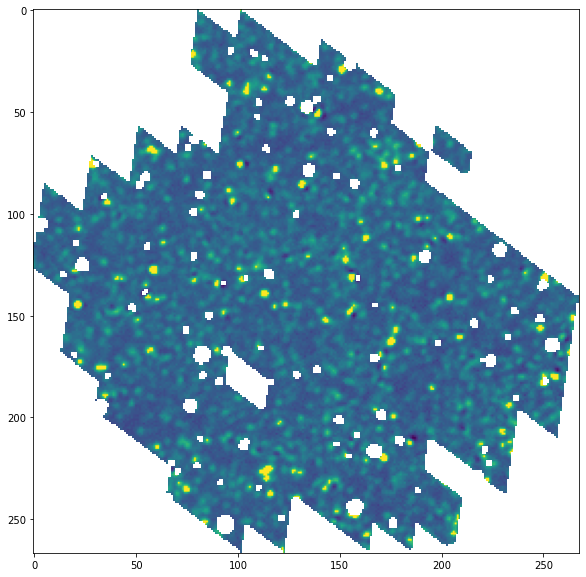

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(Pval2[1].data)

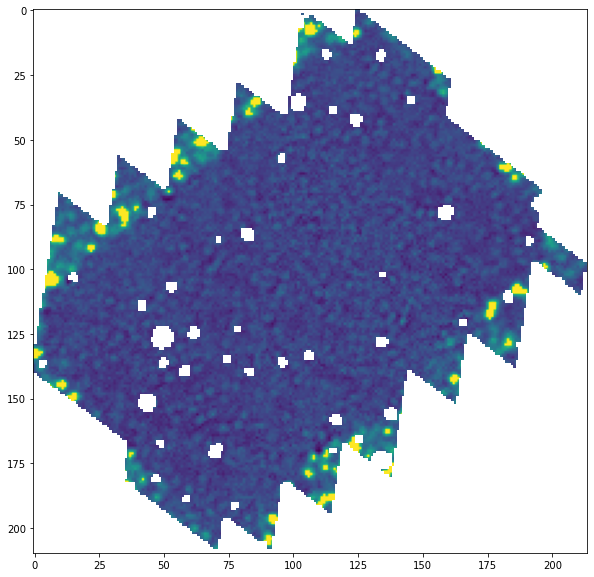

In [10]:
plt.figure(figsize=(15,10))
plt.imshow(Pval3[1].data)